In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [2]:
torch.manual_seed(1)
np.random.seed(1)

In [3]:
x = np.random.uniform(low=-1,high=1,size=(200,2))
y = np.ones(len(x))

n_train = 100

x_train = torch.tensor(x[:n_train,:],dtype=torch.float32)
y_train = torch.tensor(y[:n_train],dtype=torch.float32)
x_valid = torch.tensor(x[n_train:,:],dtype=torch.float32)
y_valid = torch.tensor(y[n_train:],dtype=torch.float32)



In [4]:
train_ds = TensorDataset(x_train,y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds,batch_size=batch_size,shuffle=True)

In [5]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2,8)
        a1 = nn.ReLU()
        l2 = nn.Linear(8,8)
        a2 = nn.ReLU()
        l3 = nn.Linear(8,1)
        a3 = nn.Sigmoid()
        l = [l1,a1,l2,a3,l3,a3]
        self.module_list = nn.ModuleList(l)
    
    def forward(self,x):
        for f in self.module_list:
            x = f(x)
        return x

    def predict(self,x):
        x = torch.tensor(x,dtype=torch.float32)
        pred = self.forward(x)[:,0]
        return (pred >= 0.5).float()

In [6]:
model =  MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=8, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [10]:
#let's train the model for 200 epochs
def train(model, num_epochs=200, train_dl=None,x_valid=None,y_valid=None):
    loss_hist_train = [0]*num_epochs
    accuracy_hist_train = [0]*num_epochs
    loss_hist_valid = [0]*num_epochs
    accuracy_hist_valid = [0]*num_epochs
    print("Num of epochs are :: {}".format(num_epochs))
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(),lr=0.0001)
    print("Optimiser is :: {}".format(optimizer))
    for epoch in range(num_epochs):
        for x_batch,y_batch in train_dl:
            pred = model(x_batch)[:,0]
            loss = loss_fn(pred,y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred >= 0.5).float() == y_batch).float()
            print("Is correct is :: {}".format(is_correct.mean()))
            accuracy_hist_train[epoch] += is_correct.mean()
        loss_hist_train[epoch] /= n_train
        accuracy_hist_train[epoch] /= n_train/batch_size
        pred = model(x_valid)[:,0]
        loss = loss_fn(pred,y_valid)
        is_correct = ((pred >= 0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid


In [8]:

history = train(model, num_epochs=100, train_dl=train_dl,x_valid=x_valid,y_valid=y_valid)

Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is :: 1.0
Is correct is

<ipython-input-9-fe1297fc3f6f>:13: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid.numpy(),y=y_valid.numpy().astype(np.integer),clf=model)
/opt/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


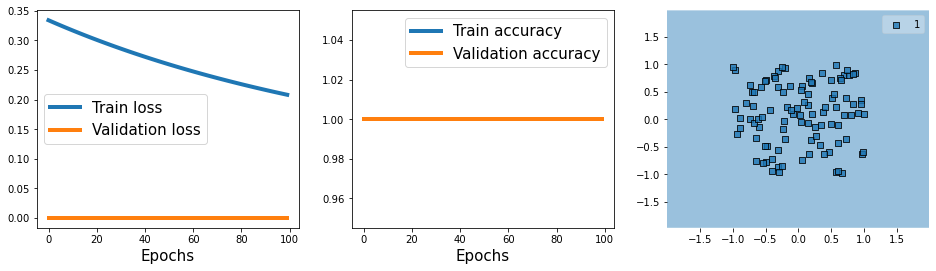

In [9]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)
plt.plot(history[0],lw=4)
plt.plot(history[1],lw=4)
plt.legend(['Train loss','Validation loss'],fontsize=15)
ax.set_xlabel('Epochs',size=15)
ax = fig.add_subplot(1,3,2)
plt.plot(history[2],lw=4)
plt.plot(history[3],lw=4)
plt.legend(['Train accuracy','Validation accuracy'],fontsize=15)
ax.set_xlabel('Epochs',size=15)
ax = fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid.numpy(),y=y_valid.numpy().astype(np.integer),clf=model)
# ax.set_label(r'$x_1$',size=15)
# ax.xaxis.set_label_coords(1,-0.025)
# ax.set_ylabel(r'$x_2$',size=15)
# ax.yaxis.set_label_coords(-0.025,1)
plt.show()